# The Data

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

df_ks = pd.read_csv('ks-projects-201801.csv', index_col='ID')
df_ks.head(1)

name category main_category currency  \
ID                                                                            
1000002330  The Songs of Adelaide & Abullah   Poetry    Publishing      GBP   

              deadline    goal             launched  pledged   state  backers  \
ID                                                                              
1000002330  2015-10-09  1000.0  2015-08-11 12:12:28      0.0  failed        0   

           country  usd pledged  usd_pledged_real  usd_goal_real  
ID                                                                
1000002330      GB          0.0               0.0        1533.95

# Percentage of currency conversion accuracy

pledged: is the pledged amount in the project currency (GPB for a project created in GBP for example)
usd pledged: is the USD conversion made by KS for the previous pledged value
usd pledged: real is the USD conversion made by fixer.io api (since KS conversion doesn't seem very accurate)

([<matplotlib.patches.Wedge at 0x15964c02b08>,
 [Text(1.0733240770188337, 0.24078086653982497, 'Kick Starter API had higher conversion'),
  Text(0.43800186020457227, 1.0090363573515746, 'fixer.io API had higher conversion'),
  Text(-0.6482496072258631, -0.8886914237976612, 'USD match up')])

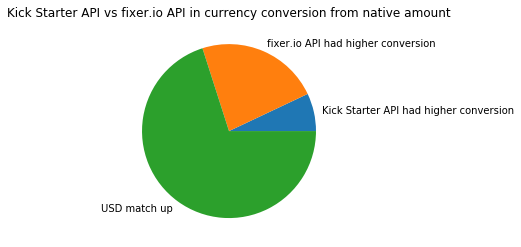

In [103]:
df_pledged = df_ks

df_pledged['pledged'] = pd.to_numeric(df_pledged['pledged'])
df_pledged['usd pledged'] = pd.to_numeric(df_pledged['usd pledged'])
df_pledged['usd_pledged_real'] = pd.to_numeric(df_pledged['usd_pledged_real'])
df_pledged = df_pledged[['pledged','usd pledged','usd_pledged_real']]

selection_kickstarter_higher = df_pledged.loc[df_pledged['usd pledged'] > df_pledged['usd_pledged_real']]
selection_kickstarter_lower = df_pledged.loc[df_pledged['usd pledged'] < df_pledged['usd_pledged_real']]
selection_equals = df_pledged.loc[df_pledged['usd pledged'] == df_pledged['usd_pledged_real']]


selection_ks_high_count = selection_kickstarter_higher.shape[0]
selection_equals_count = selection_equals.shape[0]
selection_ks_lower_count = selection_kickstarter_lower.shape[0]

total_count = selection_equals_count + selection_ks_high_count + selection_ks_lower_count
eq_perc = selection_equals_count/total_count
high_perc = selection_ks_high_count/total_count
low_perc = selection_ks_lower_count/total_count
sizes = [high_perc, low_perc, eq_perc]
labels = ['Kick Starter API had higher conversion than fixer.io', 'fixer.io API had higher conversion than Kickstarter', 'USD match up']

fig1, plot = plt.subplots()
plot.set_title("Kick Starter API vs fixer.io API in currency conversion from native amount")
plot.pie(sizes, labels = labels)


# Currency Conversion from native to USD using 2 different APIs

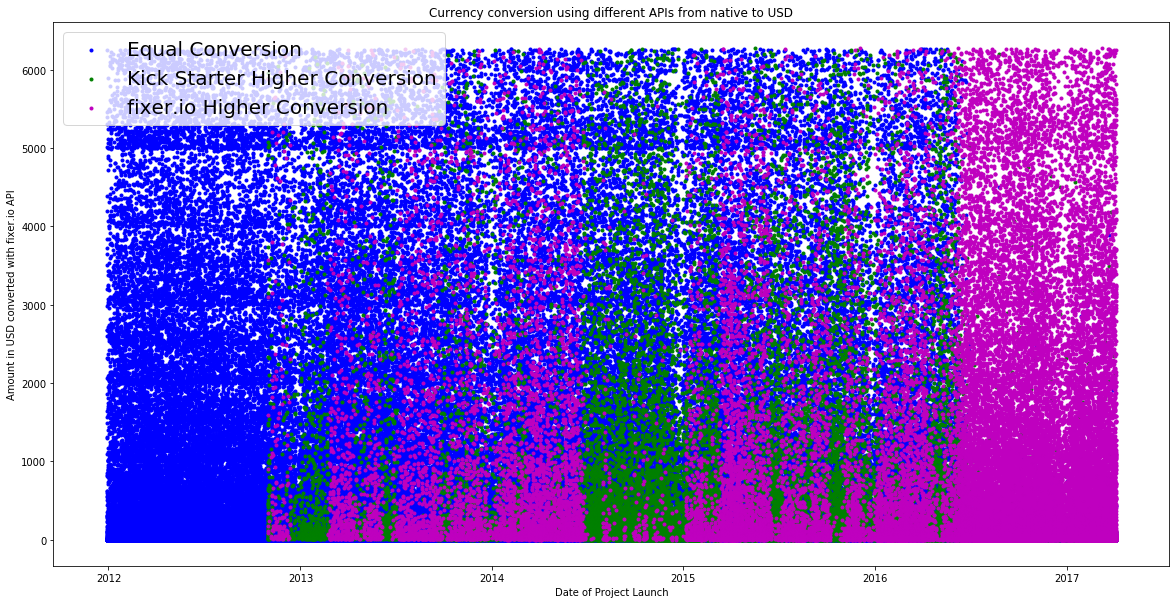

In [110]:
df_pledged = df_ks

df_pledged['pledged'] = pd.to_numeric(df_pledged['pledged'])
df_pledged['usd pledged'] = pd.to_numeric(df_pledged['usd pledged'])
df_pledged['usd_pledged_real'] = pd.to_numeric(df_pledged['usd_pledged_real'])
df_pledged['launched'] = pd.to_datetime(df_pledged['launched'])
#df_pledged = df_pledged[['name','pledged','usd pledged','usd_pledged_real']]


# Getting rid of top and bottom 10% on date, usd pledged, and usd_pledged_real
qa = df_pledged['launched'].quantile(0.1)
qb = df_pledged['launched'].quantile(0.9)
df_pledged = df_pledged.loc[(df_pledged['launched'] >= qa) & (df_pledged['launched'] <= qb)]
qa = df_pledged['usd pledged'].quantile(0.1)
qb = df_pledged['usd pledged'].quantile(0.9)
df_pledged = df_pledged.loc[(df_pledged['usd pledged'] >= qa) & (df_pledged['usd pledged'] <= qb)]
qa = df_pledged['usd_pledged_real'].quantile(0.1)
qb = df_pledged['usd_pledged_real'].quantile(0.9)
df_pledged = df_pledged.loc[(df_pledged['usd_pledged_real'] >= qa) & (df_pledged['usd_pledged_real'] <= qb)]

selection_ks_higher = df_pledged.loc[df_pledged['usd pledged'] > df_pledged['usd_pledged_real']]
selection_ks_lower = df_pledged.loc[df_pledged['usd pledged'] < df_pledged['usd_pledged_real']]
selection_equals = df_pledged.loc[df_pledged['usd pledged'] == df_pledged['usd_pledged_real']]



fig, ax = plt.subplots(figsize=(20, 10))

equals = plt.scatter(selection_equals['launched'], selection_equals['usd_pledged_real'], marker = '.', color = 'b')
high = plt.scatter(selection_ks_higher['launched'], selection_ks_higher['usd_pledged_real'], marker = '.', color = 'g')
low = plt.scatter(selection_ks_lower['launched'], selection_ks_lower['usd_pledged_real'], marker = '.', color = 'm')

plt.title("Currency conversion using different APIs from native to USD")
plt.xlabel("Date of Project Launch")
plt.ylabel("Amount in USD converted with fixer.io API")
plt.legend((equals, high, low), ('Equal Conversion', 'Kick Starter Higher Conversion', 'fixer.io Higher Conversion'), loc = 'upper left', fontsize = 20)

plt.show()

# Number of Countries That Participate on KickStarter

In [2]:
df_ks.country.nunique()

23

# Number of Kickstarters Under Each Country

In [3]:
df_kscountry = df_ks['country'].value_counts().rename_axis('Country').reset_index(name='Count')
df_kscountry

Country   Count
0       US  292627
1       GB   33672
2       CA   14756
3       AU    7839
4       DE    4171
5     N,0"    3797
6       FR    2939
7       IT    2878
8       NL    2868
9       ES    2276
10      SE    1757
11      MX    1752
12      NZ    1447
13      DK    1113
14      IE     811
15      CH     761
16      NO     708
17      HK     618
18      BE     617
19      AT     597
20      SG     555
21      LU      62
22      JP      40

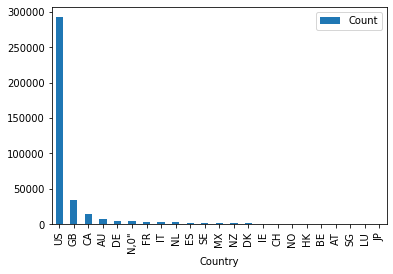

In [4]:
import matplotlib.pyplot as plt
kscountryPlot = df_kscountry.plot.bar('Country','Count')

# Backers vs Pledged

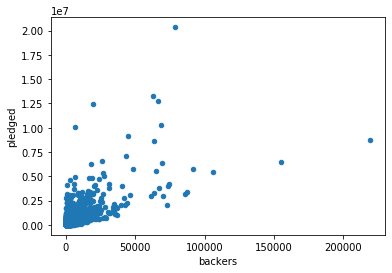

In [5]:
ksBackerPlot = df_ks.plot.scatter('backers','pledged')

# Analyzing the 'State' of KickStarters